In [1]:
import time
import ROOT
import numpy as np
import pandas as pd
import root_pandas as rpd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from root_pandas import read_root
%run functions.ipynb
%run constants.ipynb

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed',)).History will not be written to the database.
Welcome to JupyROOT 6.14/06


In [13]:
def getData(inputFiles):
    cols = []
    scalar = []
    scalar.append('evid')
    scalar.append('xsec')
    scalar.append('ntrials')    
    scalar.append('x')
    scalar.append('y')
    scalar.append('Q2')
    scalar.append('W2')
    scalar.append('pt_jet')
    scalar.append('pt_jet_g')
    scalar.append('phi_jet')
    scalar.append('pt_quark')
    scalar.append('eta_quark')
    scalar.append('phi_quark')
    scalar.append('pt_photon')
    scalar.append('phi_photon')
    scalar.append('pt_electron')
    lists = scalar
    dataframes = []
    for inputFilename in inputFiles:
        start = time.time()
        df = read_root(inputFilename, columns=lists,flatten=cols)
        dataframes.append(df)
        end = time.time()
        print '\n', 'Processed', inputFilename, 'in',  '%2.1f'%(end-start), 'seconds'
    return pd.concat([x for x in dataframes])

In [14]:
dataFiles = ["$HOME/EIC/output/102.root"]
a = getData(dataFiles)


Processed $HOME/EIC/output/102.root in 66.9 seconds


In [3]:
d = applyCut(a, 'pt_electron > 4', 'pt_electron > 4')
d = applyCut(d, 'pt_jet > 4', 'pt_jet > 4')
d = applyCut(d, 'y > 0.01 and y < 0.85', '0.01 < y < 0.85')
#d = applyCut(d, '0.05 < x < 0.1', '0.05 < x < 0.1')
d = applyCut(d, '10 < pt_electron < 15', '10 < pt_electron < 15')

d = getDelta(d, 'electron')
d = getDelta(d, 'quark')
d = fixPhi(d, 'photon')
d.eval('pt_ratio = pt_jet/pt_electron', inplace = True)

pt_electron > 4 1548370  fraction kept: 4.3
pt_jet > 4 304784  fraction kept: 19.7
0.01 < y < 0.85 291288  fraction kept: 95.6
10 < pt_electron < 15 18885  fraction kept: 6.5
Added colomns for variables of electron jet correlation
Added colomns for variables of quark jet correlation
Fixed photon phi range
Fixed photon delta phi range


In [4]:
d1 = applyCut(d, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')

delta_phi_photon_abs < 0.4 17229  fraction kept: 91.2


In [5]:
def plotRatio1dnvar(txt):
    fig = plt.figure(figsize = (10,8))
    plot1dnvar([d, d1], ['pt_ratio']*2,\
               ['$p_T^{jet} > 4 GeV$',\
                '$p_T^{jet} > 4 GeV$ \n $|\Delta \phi|< 0.4$'],\
               0, 2, 0, 7e6, 0.05, '$p_T^{jet}/p_T^{electron}$', 'linear', txt)

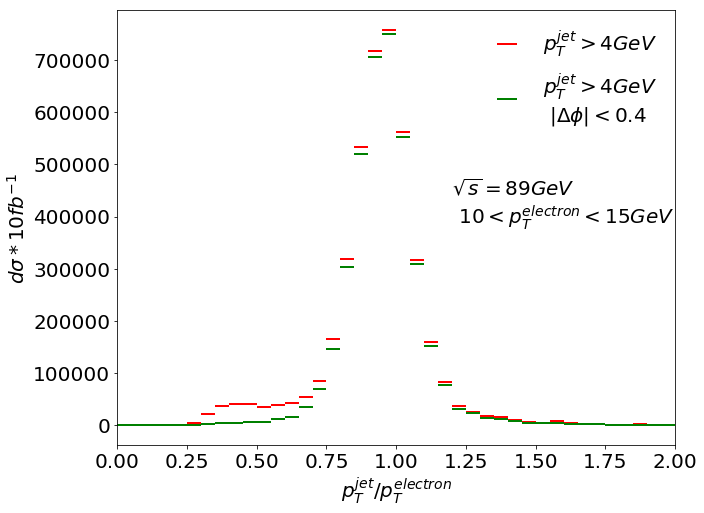

In [6]:
fig = plotRatio1dnvar('pt_ratio')
plt.text(1.2,380000,'$\sqrt{s}=89 GeV$ \n $10 < p_T^{electron} < 15 GeV$', fontsize = 20)
plt.savefig('images/pt_ratio_no_x_cut.pdf', bbox_inches='tight')

In [7]:
b = applyCut(a, 'y > 0.01 and y < 0.85', '0.01 < y < 0.85')
b = fixPhi(b, 'photon')
b = applyCut(b, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')
b1 = keepOneJet(b)

0.01 < y < 0.85 24447811  fraction kept: 67.2
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 5207745  fraction kept: 21.3

Remove extra jets 3954404  fraction kept: 75.9


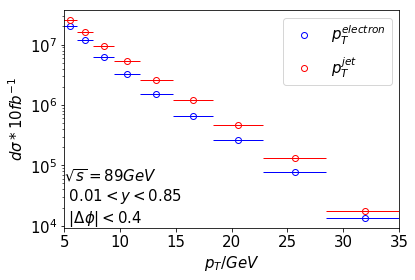

In [8]:
xvar_array = toArrayFloat(0.69, 1.55, 0, log=True, logNum=10)
xsec = np.mean(a['xsec'])
ntrials = a['ntrials'][a.shape[0]-1]
    
x1, y1, xerr = getHist(b1, 'pt_electron', xvar_array)
x2, y2, xerr = getHist(b, 'pt_jet', xvar_array)

plt.errorbar(x1, 10*y1*xsec*1e12/ntrials, xerr = xerr, fmt='none', color='b', elinewidth=1)
plt.plot(x1, 10*y1*xsec*1e12/ntrials, 'bo', fillstyle='none', label='$p_T^{electron}$')
plt.errorbar(x2, 10*y2*xsec*1e12/ntrials, xerr=xerr, fmt='none', color='r', elinewidth=1)
plt.plot(x2, 10*y2*xsec*1e12/ntrials, 'ro', fillstyle='none', label='$p_T^{jet}$')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.xlabel('$p_T/GeV$', fontsize=15)
plt.ylabel('$d\sigma*10fb^{-1}$', fontsize=15)
plt.xlim(left=5, right=35)
plt.legend(prop={'size': 15}, frameon=True, loc='best')
plt.text(5,1e4,'$\sqrt{s} = 89 GeV$ \n $0.01 < y < 0.85$ \n $|\Delta\phi|<0.4$',\
        fontsize=15)
plt.savefig('images/pt_electron_jet.pdf', bbox_inches='tight')

In [28]:
b = applyCut(a, 'y > 0.01 and y < 0.85', '0.01 < y < 0.85')
b = applyCut(b, 'Q2 > 25', 'Q2 > 25')
b = fixPhi(b, 'photon')
b = applyCut(b, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')
b1 = keepOneJet(b)

0.01 < y < 0.85 24447811  fraction kept: 67.2
Q2 > 25 1150592  fraction kept: 4.7
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 346409  fraction kept: 30.1

Remove extra jets 249203  fraction kept: 71.9


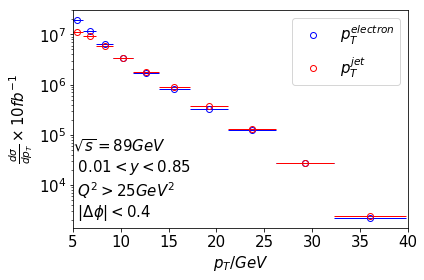

In [29]:
xvar_array = toArrayFloat(0.69, 1.60, 0, log=True, logNum=11)
xsec = np.mean(a['xsec'])
ntrials = a['ntrials'][a.shape[0]-1]
    
x1, y1, xerr = getHist(b1, 'pt_electron', xvar_array)
x2, y2, xerr = getHist(b, 'pt_jet', xvar_array)

plt.errorbar(x1, 10*y1*xsec*1e12/ntrials, xerr = xerr, fmt='none', color='b', elinewidth=1)
plt.plot(x1, 10*y1*xsec*1e12/ntrials, 'bo', fillstyle='none', label='$p_T^{electron}$')
plt.errorbar(x2, 10*y2*xsec*1e12/ntrials, xerr=xerr, fmt='none', color='r', elinewidth=1)
plt.plot(x2, 10*y2*xsec*1e12/ntrials, 'ro', fillstyle='none', label='$p_T^{jet}$')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.xlabel('$p_T/GeV$', fontsize=15)
plt.ylabel(r'$\frac{d\sigma}{dp_T} \times 10fb^{-1}$', fontsize=15)
plt.xlim(left=5, right=40)
plt.legend(prop={'size': 15}, frameon=True, loc='best')
plt.text(5,2e3,'$\sqrt{s} = 89 GeV$ \n $0.01 < y < 0.85$ \n $Q^2 > 25 GeV^2$ \n $|\Delta\phi|<0.4$',\
        fontsize=15)
plt.savefig('images/pt_electron_jet_Q2_25.pdf', bbox_inches='tight')

In [24]:
b = applyCut(a, 'y > 0.1 and y < 0.85', '0.1 < y < 0.85')
b = applyCut(b, 'Q2 > 25', 'Q2 > 25')
b = fixPhi(b, 'photon')
b = applyCut(b, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')
b1 = keepOneJet(b)

0.1 < y < 0.85 6783540  fraction kept: 18.7
Q2 > 25 785883  fraction kept: 11.6
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 220056  fraction kept: 28.0

Remove extra jets 146644  fraction kept: 66.6


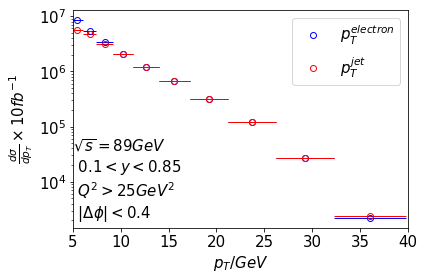

In [27]:
xvar_array = toArrayFloat(0.69, 1.60, 0, log=True, logNum=11)
xsec = np.mean(a['xsec'])
ntrials = a['ntrials'][a.shape[0]-1]
    
x1, y1, xerr = getHist(b1, 'pt_electron', xvar_array)
x2, y2, xerr = getHist(b, 'pt_jet', xvar_array)

plt.errorbar(x1, 10*y1*xsec*1e12/ntrials, xerr = xerr, fmt='none', color='b', elinewidth=1)
plt.plot(x1, 10*y1*xsec*1e12/ntrials, 'bo', fillstyle='none', label='$p_T^{electron}$')
plt.errorbar(x2, 10*y2*xsec*1e12/ntrials, xerr=xerr, fmt='none', color='r', elinewidth=1)
plt.plot(x2, 10*y2*xsec*1e12/ntrials, 'ro', fillstyle='none', label='$p_T^{jet}$')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.yscale('log')
plt.xlabel('$p_T/GeV$', fontsize=15)
plt.ylabel(r'$\frac{d\sigma}{dp_T} \times 10fb^{-1}$', fontsize=15)
plt.xlim(left=5, right=40)
plt.legend(prop={'size': 15}, frameon=True, loc='best')
plt.text(5,2e3,'$\sqrt{s} = 89 GeV$ \n $0.1 < y < 0.85$ \n $Q^2 > 25 GeV^2$ \n $|\Delta\phi|<0.4$',\
        fontsize=15)
plt.savefig('images/pt_electron_jet_y.pdf', bbox_inches='tight')

In [15]:
d = applyCut(a, 'pt_electron > 4', 'pt_electron > 4')
d = applyCut(d, 'pt_jet > 4', 'pt_jet > 4')
d = applyCut(d, '0.01 < y < 0.85', '0.01 < y < 0.85')
d = fixPhi(d, 'photon')
d = applyCut(d, 'delta_phi_photon_abs < 0.4', 'delta_phi_photon_abs < 0.4')

pt_electron > 4 1548370  fraction kept: 4.3
pt_jet > 4 304784  fraction kept: 19.7
0.01 < y < 0.85 291288  fraction kept: 95.6
Fixed photon phi range
Fixed photon delta phi range
delta_phi_photon_abs < 0.4 233094  fraction kept: 80.0


In [16]:
d.eval('pt_ratio = pt_jet / pt_electron', inplace=True)
d.eval('pt_ratio_g = pt_jet_g / pt_electron', inplace=True)
d1 = applyCut(d, '5 < pt_electron < 10', '5 < pt_electron < 10')
d2 = applyCut(d, '10 < pt_electron < 15', '10 < pt_electron < 15')
d3 = applyCut(d, '20 < pt_electron < 30', '20 < pt_electron < 30')

5 < pt_electron < 10 142916  fraction kept: 61.3
10 < pt_electron < 15 17229  fraction kept: 7.4
20 < pt_electron < 30 950  fraction kept: 0.4


In [17]:
def plot_ratio(df, var_array, label_array, color_array):
    for i in range(0,len(var_array)):
        fig = plt.hist(df[var_array[i]], label=label_array[i], range=(0.25,1.75), bins=30, histtype='step', fill=True, stacked=True, normed=True, alpha=0.5, color=color_array[i], linewidth=2)
    return fig

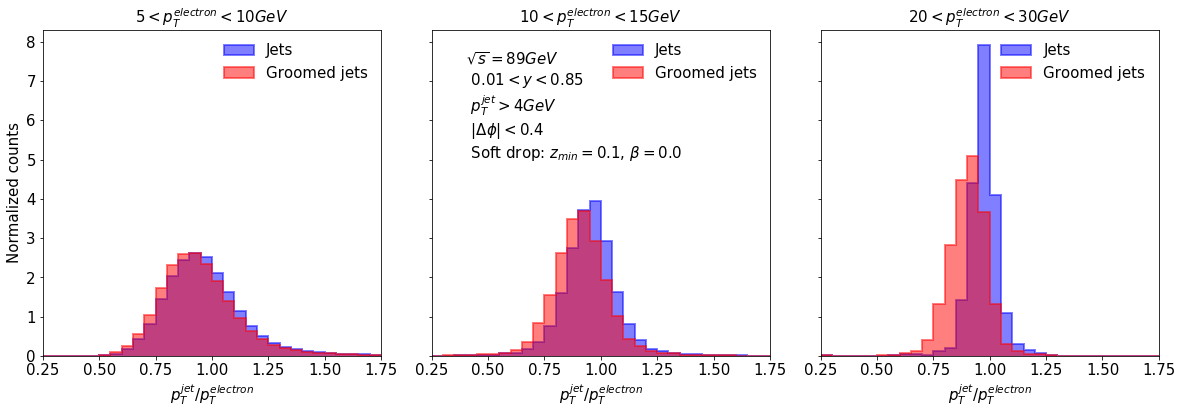

In [28]:
fig = plt.figure(figsize=(20,6))
plt.subplots_adjust(wspace=0.15, hspace=0)

ax1 = plt.subplot(131)
plot_ratio(d1, ['pt_ratio', 'pt_ratio_g'], ['Jets', 'Groomed jets'], ['b', 'r'])
plt.xlabel('$p_T^{jet}/p_T^{electron}$', fontsize=15)
plt.ylabel('Normalized counts', fontsize=15)
plt.xticks(np.arange(0.25,2.00,0.25),fontsize=15)
plt.yticks(fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.xlim(left=0.25, right=1.75)
plt.title('$5 < p_T^{electron} < 10 GeV$', fontsize=15)

ax2 = plt.subplot(132, sharey=ax1)
plot_ratio(d2, ['pt_ratio', 'pt_ratio_g'], ['Jets', 'Groomed jets'], ['b', 'r'])
plt.xlabel('$p_T^{jet}/p_T^{electron}$', fontsize=15)
plt.xticks(np.arange(0.25,2.00,0.25),fontsize=15)
plt.setp(ax2.get_yticklabels(), visible=False)
plt.text(0.4, 5, '$\sqrt{s} = 89 GeV$ \n $0.01 < y < 0.85$ \n $p_T^{jet} > 4 GeV$ \n $|\Delta \phi| < 0.4$ \n Soft drop: $z_{min} = 0.1$, ' + r'$\beta = 0.0$',\
         fontsize=15)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.xlim(left=0.25, right=1.75)
plt.title('$10 < p_T^{electron} < 15 GeV$', fontsize=15)

ax3 = plt.subplot(133, sharey=ax1)
plot_ratio(d3, ['pt_ratio', 'pt_ratio_g'], ['Jets', 'Groomed jets'], ['b', 'r'])
plt.xlabel('$p_T^{jet}/p_T^{electron}$', fontsize=15)
plt.xticks(np.arange(0.25,2.00,0.25),fontsize=15)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.legend(prop={'size': 15}, frameon=False, loc='best')
plt.xlim(left=0.25, right=1.75)
plt.title('$20 < p_T^{electron} < 30 GeV$', fontsize=15)

plt.savefig('images/pt_ratio_2.pdf', bbox_inches='tight')